
Table for Beta_0=0.95913, Beta_1=0, followed by Beta_0=0.95913, Beta_1=0


"Iteration,t",Beta,Hessian
0,[[0.95913] [0. ]],[[ 0.01096355 -0.11774922] [-0.11774922 2.24636741]]
1,[[ 1.72028763] [-13.90963144]],[[ 0.01376919 -0.14444378] [-0.14444378 2.43426036]]
2,[[ 1.75721969] [-13.38389891]],[[ 0.01399076 -0.14439871] [-0.14439871 2.40178607]]
3,[[ 1.75870063] [-13.40003398]],[[ 0.01400062 -0.1445039 ] [-0.1445039 2.40316643]]
4,[[ 1.75870116] [-13.40003968]],[[ 0.01400062 -0.14450394] [-0.14450394 2.40316692]]
5,[[ 1.75870116] [-13.40003968]],[[ 0.01400062 -0.14450394] [-0.14450394 2.40316692]]
6,[[ 1.75870116] [-13.40003968]],[[ 0.01400062 -0.14450394] [-0.14450394 2.40316692]]
7,[[ 1.75870116] [-13.40003968]],[[ 0.01400062 -0.14450394] [-0.14450394 2.40316692]]
8,[[ 1.75870116] [-13.40003968]],[[ 0.01400062 -0.14450394] [-0.14450394 2.40316692]]
9,[[ 1.75870116] [-13.40003968]],[[ 0.01400062 -0.14450394] [-0.14450394 2.40316692]]


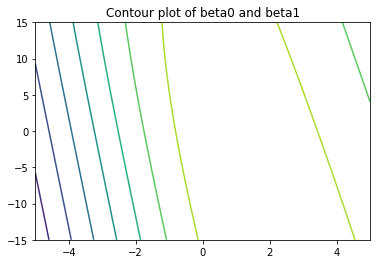

<Figure size 432x288 with 0 Axes>

In [69]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Jan 30 22:09:46 2020

@author: Clayton Fields
"""

import numpy as np
import pandas as pd
from numpy.linalg import inv
from numpy.linalg import multi_dot
import matplotlib.pyplot as plt
import scipy.stats as stat

"""
Problem 1: From example 2.5
"""
#initialize variables
data = pd.read_csv('facerecognition.dat',sep=" ")
eyediff = data['eyediff'].to_numpy().reshape(1042,1)
n = eyediff.size
y = data['match'].to_numpy().reshape(n,1)
ones = np.ones((1042,1))
Z = np.hstack((ones,eyediff))
#beta = np.array([.9591309,0]).reshape(2,1)
#beta = np.array([0,0]).reshape(2,1)
W = np.zeros((n,n))
b = -np.log(1-np.pi)
#tol = np.array([.000001,.000001])
k = 0

df = pd.DataFrame({'iter':[], 'beta':[],'hessian':[]})
h = b = {}
betas = [np.array([.95913,0]).reshape(2,1),np.array([0,0]).reshape(2,1)]
b0hista = [betas[0][0]]
b1hista = [betas[0][1]]
b0histb = [betas[1][0]]
b1histb = [betas[1][1]]
ls = []
for beta in betas:
    for i in range(10):
        #print("iteration: %d" %i, beta)
        pi=(1/(1+np.exp(-1*Z.dot(beta)))).reshape(n,1)
        fill = pi*(1-pi)
        np.fill_diagonal(W,fill)
        Hessian = inv(multi_dot((Z.T,W,Z)))
        data_value = [i,beta,Hessian]
        ls.append(data_value)
        foo = Z.T.dot(y-pi)
        update = Hessian.dot(foo)
        beta = beta + update
#         b0hista.append([0][0])
#         b1hista.append(betas[0][1])
#         b0histb.append(betas[1][0])
#         b1histb.append(betas[1][1])
        k+=1
#        plt.plot(beta[0],beta[1],'ro-')
#    print(k,b[i],h[i])

    

#Create contour
x0 = np.linspace(-5,5,100)
y0 = np.linspace(-15,15,100)
X,Y = np.meshgrid(x0,y0)
def l(y,z,beta1,beta2):
    ones = np.ones((y.shape[0],1))
    beta = np.array([beta1,beta2]).reshape(2,1)
    pi=(1/(1+np.exp(-1*Z.dot(beta)))).reshape(y.size,1)
    b = -np.log(1-pi)
    return multi_dot((y.T,Z,beta))-b.T.dot(ones)
Zmesh = np.zeros((X.shape[0],Y.shape[0]))
for i in range(X.shape[0]):
    for j in range(Y.shape[0]):
        b0 = X[i,j]; b1 = Y[i,j]
        Zmesh[i,j]=l(y,Z,b0,b1)
plt.contour(X,Y,Zmesh) 
plt.title('Contour plot of beta0 and beta1')
plt.figure()
print()

print("Table for Beta_0=0.95913, Beta_1=0, followed by Beta_0=0.95913, Beta_1=0")
df = pd.DataFrame(ls, columns = ['Iteration,t','Beta','Hessian'])
df = df.style.hide_index()
df = df.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
df

Part 2.a: Newton's Method: 
Theta estimate for x0= -11 : inf
Iterations:  255
Theta estimate for x0= -1 : -0.19228646762465854
Iterations:  258
Theta estimate for x0= 0 : -0.1922866132255957
Iterations:  261
Theta estimate for x0= 1.5 : 1.7135868348079244
Iterations:  265
Theta estimate for x0= 4 : 2.8174724368887514
Iterations:  269
Theta estimate for x0= 4.7 : -0.19228651191810686
Iterations:  273
Theta estimate for x0= 7 : 41.040847821035634
Iterations:  281
Failed to Converge
Theta estimate for x0= 8 : -1145180.1165361358
Iterations:  300
Failed to Converge
Theta estimate for x0= 38 : 38
Iterations:  301
Failed to Converge
Theta estimate for x0= 5.106 : 5.106
Iterations:  302

Part 2.b: bisection
Bisection estimate for [-2.00,0.00]:  -0.19228696823120117
Iterations:  21
Bisection estimate for [-1.00,1.00]:  -0.19228696823120117
Iterations:  21
Bisection estimate for [0.00,2.00]:  1.7135872840881348
Iterations:  21
Bisection estimate for [1.00,3.00]:  1.7135872840881348
Iterations: 

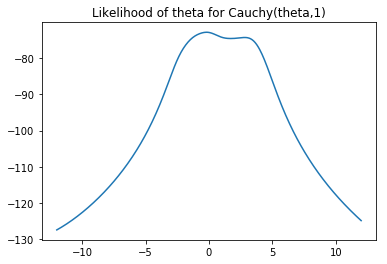

In [63]:
"""
Problem 2: 
"""
    
def cauchy(x,theta,loc):
    return (1/np.pi)*(theta/((x-loc)**2+theta**2))

def l(x,theta):
    n = x.size
    foo = -np.log([1+(x[i]-theta)**2 for i in range(n)]).sum(axis=0)
    return  - n*np.log(np.pi) + foo

def lprime(x,theta):
    n = x.size
    foo=[]
    for i in range(n):
        foo.append(2*(x[i]-theta)/((x[i]-theta)**2+1))
    return sum(foo)

def l2prime(x,theta):
     n = x.size
     foo=[]
     for i in range(n):
         foo.append((-2*(theta**2-2*theta*x[i]+x[i]**2-1))/((theta**2-2*theta*x[i]+x[i]**2+1)**2))
     
     return  sum(foo)
 
def h(x,theta):
    return lprime(x,theta)/l2prime(x,theta)
     

domain = np.linspace(-12,12,400)
#plt.plot(domain,cauchy(domain,1,0))

sample = np.asarray([1.77, -.23, 2.76, 3.80, 3.47, 56.75, -1.34, 4.24, -2.44, 3.29,
          3.71, -2.40, 4.53, -.07, -1.05, -13.87, -2.53, -1.75, .27, 43.21])

plt.figure()
plt.plot(domain, l(sample,domain))
plt.title("Likelihood of theta for Cauchy(theta,1)")
avg = sample.mean()
theta0 = [-11,-1,0,1.5,4,4.7,7,8,38,avg]
#plt.plot(theta,l(sample,theta,),'ro')
k=0
np.seterr(all="ignore")
print("Part 2.a: Newton's Method: ")
for theta in theta0:
    string = 'Theta estimate for x0= '+str(theta)+' :'
    while np.abs(h(sample,theta))>.000001:
        k+=1
        if(k>=300):
            print('Failed to Converge')
            break
        theta = theta + h(sample,theta)
    print(string,theta)
    print('Iterations: ',k)
print()



##Bisection


#choose a suitable termination criteria
eps = .000001
kmax = 100

#initialize variable for bisection loop
k =1
#xhist = [x]
#khist = [k]
ainit= [-2,-1,0,1]
binit = [0,1,2,3]



#perform bisection to find zero of f'(x)
print("Part 2.b: bisection")
for i in range(len(ainit)):
    #set an interval on which to search for max
    a = ainit[i]
    b = binit[i]
    k=0
    #choose x as the middle of the interval
    x = .5*(a+b)
    string= ("Bisection estimate for [%.2f,%.2f]: "%(a,b))
    while ((b-a)>eps):
        k+=1
        if lprime(sample,a)*lprime(sample,x)<=0:
            b=x
        elif lprime(sample,a)*lprime(sample,x)>0:
            a=x
        x = .5*(a+b)
    print(string,x)
    print('Iterations: ',k)
print()
    
##Fixed point interation
alphas = [1,.64,.25]
print('Part 2.c: Fixed-point iteration')
k=0
for alpha in alphas:
    theta = -1 #
    while lprime(sample,theta)>.00000000001:
        theta = theta + alpha*lprime(sample,theta) 
        k+=1    
    print('Fixed-point estimate for alpha = %.2f is: ' %alpha,theta)
    print('Iterations',k)
print()

##Secant Method

#x2 = x1 - fx1*(x1-x0)/(fx1-fx0)
print('Part 2.d: Secant Method')
ainit = [-3,-2,-1,0]
binit = [3,-1,0,2]
for i in range(len(ainit)):
    k=0
    x0=ainit[i]
    x1=binit[i]
    x2=x1+x0
    fx0 = lprime(sample,x0); fx1 = lprime(sample,x1)
    while abs((x0-x1))>.000000000001:
#    for 
        x2 = x1 - lprime(sample,x1)*(x1-x0)/(lprime(sample,x1)-lprime(sample,x0))
    #    fx1 = lprime(sample,x1); fx2 = lprime(sample,x2)
        x0=x1; x1=x2; fx0=fx1; fx1 = lprime(sample,x2)
        k+=1
    print('Secant estimate for [%.2f,%.2f]: '%(ainit[i],binit[i]),x2)
    print('Iterations: ',k)
#plt.plot(x2,l(sample,x2,),'g*')
    


e) For the estimates of the MLE of the Cauchy Distribution the fastest method that was accuarate was the secant metod. Newton's method was also very unstable relative to different starting points. 

In [60]:
np.random.seed(2244)
rand = np.random.normal(scale=1.0,size=20)

def likeN(x,theta):
    n = x.size
    total = np.array([-x[i]^2 + x[i]*theta - theta^2 for i in range(n)]).sum(axis=0)
    return total - n*np.log(np.sqrt(2*np.pi))
def lprimeN(x,theta):
    n = x.size
    return np.array([x[i]-theta for i in range(n)]).sum(axis=0) 
def l2primeN(x,theta):
    return -x.size
def hN(x,theta):
    return -lprimeN(x,theta)/l2primeN(x,theta)
#Newtons
print()
print("Results from 2.e")
print("Part 2.e: Newton's Method: ")
for theta in theta0:
    string = 'Theta estimate for x0= '+str(theta)+' :'
    while np.abs(h(rand,theta))>.000001:
        k+=1
        if(k>=300):
            print('Failed to Converge')
            break
        theta = theta + h(rand,theta)
    print(string,theta)
    print('Iterations: ',k)
print()
#Bisection
print("Part 2.e: bisection")
for i in range(len(ainit)):
    #set an interval on which to search for max
    a = ainit[i]
    b = binit[i]
    k=0
    #choose x as the middle of the interval
    x = .5*(a+b)
    string= ("Bisection estimate for [%.2f,%.2f]: "%(a,b))
    while ((b-a)>eps):
        k+=1
        if lprimeN(rand,a)*lprimeN(rand,x)<=0:
            b=x
        elif lprimeN(rand,a)*lprimeN(rand,x)>0:
            a=x
        x = .5*(a+b)
    print
    print(string,x)
    print('Iterations: ',k)
print()

##Fixed point interation
alphas = [1,.64,.25]
print('Part 2.e: Fixed-point iteration')
k=0
for alpha in alphas:
    theta = -1 #
    while lprime(sample,theta)>.00000000001:
        theta = theta + alpha*lprime(rand,theta) 
        k+=1    
    print('Fixed-point estimate for alpha = %.2f is: ' %alpha,theta)
    print('Iterations',k)
print()

##Secant Method

#x2 = x1 - fx1*(x1-x0)/(fx1-fx0)
print('Part 2.e: Secant Method')
ainit = [-3,-2,-1,0]
binit = [3,-1,0,2]
for i in range(len(ainit)):
    k=0
    x0=ainit[i]
    x1=binit[i]
    x2=x1+x0
    fx0 = lprime(rand,x0); fx1 = lprime(rand,x1)
    while abs((x0-x1))>.000000000001:
#    for 
        x2 = x1 - lprime(rand,x1)*(x1-x0)/(lprime(rand,x1)-lprime(rand,x0))
    #    fx1 = lprime(sample,x1); fx2 = lprime(sample,x2)
        x0=x1; x1=x2; fx0=fx1; fx1 = lprime(rand,x2)
        k+=1
    print('Secant estimate for [%.2f,%.2f]: '%(ainit[i],binit[i]),x2)
    print('Iterations: ',k)


Results from 2.e
Part 2.e: Newton's Method: 
Theta estimate for x0= -11 : inf
Iterations:  262
Theta estimate for x0= -1 : -0.23331954038885885
Iterations:  266
Theta estimate for x0= 0 : -0.23331909785712643
Iterations:  268
Failed to Converge
Theta estimate for x0= 1.5 : -3932016872.6225567
Iterations:  300
Failed to Converge
Theta estimate for x0= 4 : 4
Iterations:  301
Failed to Converge
Theta estimate for x0= 4.7 : 4.7
Iterations:  302
Failed to Converge
Theta estimate for x0= 7 : 7
Iterations:  303
Failed to Converge
Theta estimate for x0= 8 : 8
Iterations:  304
Failed to Converge
Theta estimate for x0= 38 : 38
Iterations:  305
Failed to Converge
Theta estimate for x0= 5.106 : 5.106
Iterations:  306

Part 2.e: bisection
Bisection estimate for [-3.00,3.00]:  -0.24882495403289795
Iterations:  23
Bisection estimate for [-2.00,-1.00]:  -1.0000004768371582
Iterations:  20
Bisection estimate for [-1.00,0.00]:  -0.2488245964050293
Iterations:  20
Bisection estimate for [0.00,2.00]:  1.

The results were relatively similar for the methods with a random sample from the normal distribution. The secant method appeared to be the most stable and converge in the fewest iterations.

Final are:  0.951207104273593
Iterations 8923
The resulting interval is [ 0.0671 4.827892413086407 ]


Text(0.5, 1.0, 'Interval containg 95% density')

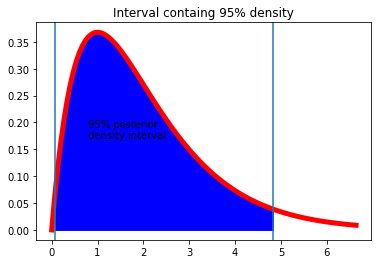

In [70]:
"""
Problem3: From 2.4
"""
a =2
domain= np.linspace(stat.gamma.ppf(0.0, a), stat.gamma.ppf(0.99, a), 100)
probs = stat.gamma.pdf(domain,a)
maxprob = np.max(probs)
xmax = np.argmax(probs)
plt.figure()
plt.plot(domain,probs,lw=5,color='r')
k=0
step = maxprob/10000
#step = .00001
area = 0


while area<=.950000 and k<10000:
    probability = maxprob - k*step
    vals = np.abs(probs-probability)
    l = vals[0:xmax]
    r = vals[xmax:-1]
    lxmin = np.argmin(l)
    rxmin = np.argmin(r)
    lmin = domain[lxmin]
    rmin = domain[rxmin+len(l)]
    area = stat.gamma.cdf(rmin,a) - stat.gamma.cdf(lmin,a)
    k+=1
print('Final are: ',area)
print('Iterations',k)
print('The resulting interval is [','%.4f'%lmin,rmin,']')

plt.axvline(lmin,label='a = %f.4'%lmin)
plt.axvline(rmin,label='b = %f.4'%rmin)
x = np.arange(lmin, rmin, 0.01)
plt.fill_between(x, stat.gamma.pdf(x, a), color = 'b')
plt.annotate('95% posterior \ndensity interval', (0.8, 0.17))
plt.title("Interval containg 95% density")

